In [1]:
import numpy as np
import numbers
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

We used a figure 8 design to see how [ISOMAP](https://en.wikipedia.org/wiki/Isomap) would work with something that technically is not a manifold due to its intersection. Recall back to the definition of a manifold being that each point locally resembles an n-dimensional Euclidean space $\mathbb{R}^n$. In the case of a figure 8 the neighbourhood around each point on the surface (or the loops of the figure 8) locally maps $\mathbb{R}^2$, except along the line of intersection which locally maps $\mathbb{R}^1$. The figure 8 is therefore not a proper manifold because there is a dimensional mismatch. (If we remove the crossing point of the figure 8 then, yes it would be a manifold.)

In [2]:
# Generate an S curve dataset
def eight_figure(n_size):
    """
    random.rand function creates an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
    sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0
    squeeze function removes axes of length one from a.
    """
    
    t = 4 * np.pi * (np.random.rand(1, n_size) - 0.5)
    x = np.sin(t)
    y = 2.0 * np.random.rand(1, n_size)
    z = np.sign(t) * (np.cos(t) - 1)
    
    df = np.concatenate((x, y, z)) #dataset
    df = df.T
    t = np.squeeze(t)

    return (df, t)

def swiss_roll(n_size):

    #Centers for each 2d Gaussian distribution
    mu_list = [(7.5, 7.5),(7.5, 12.5), (12.5, 7.5), (12.5, 12.5)]

    #Preparing the batter
    #generating x and y coordinates by drawing from a Gaussian Distribution with 
    #mean = 0, sd = 1.5, n times
    x, y = np.array([]), np.array([]) #empty arrays
    for mu_x, mu_y in mu_list: #loop through the differnt distribution centers
        
        x = np.concatenate((x, np.random.normal(loc=mu_x, scale=1.5, size=n_size)))
        y = np.concatenate((y, np.random.normal(loc=mu_y, scale=1.5, size=n_size)))
    X = x*np.cos(x)
    Y = y
    Z = x*np.sin(x)
    return (X,Y,Z,x)

In [3]:
sample_size = 1000
# Generate Figure-Eight dataset
dat, colour =  eight_figure(n_size=sample_size)

Here is the $\mathbb{R}^3$ figure 8

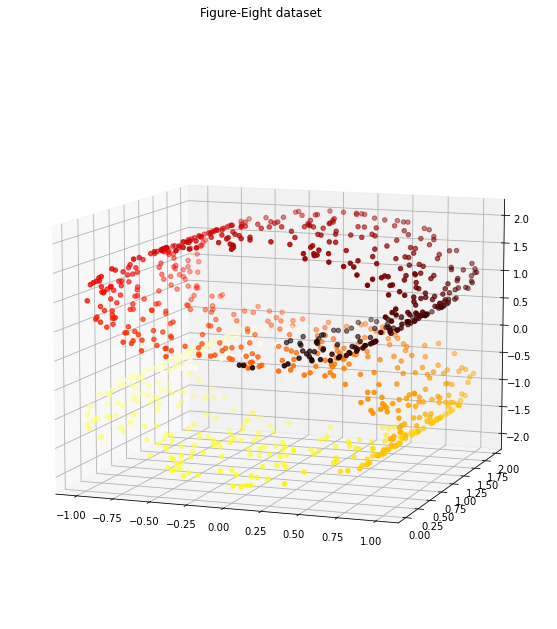

In [4]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection = '3d')
plt.suptitle("Figure-Eight dataset")
ax.scatter(dat[:, 0], dat[:, 1], dat[:, 2], c=colour, cmap='hot')
ax.view_init(10, -70) #change the viewing angle
plt.show()

In [5]:
sample_size_swiss = 1000
# Generate S-dataset
X,Y,Z, colour_swiss =  swiss_roll(n_size=sample_size_swiss)

df_swiss = np.concatenate(([X],[Y],[Z]), axis=0)
df_swiss = df_swiss.T

Here is the $\mathbb{R}^3$ swiss roll

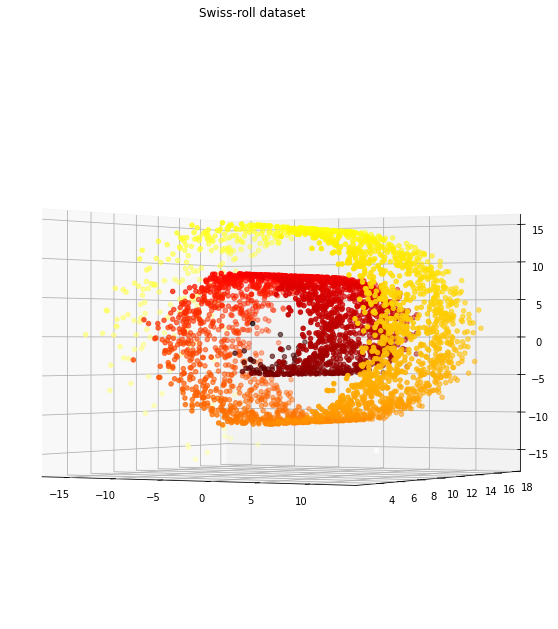

In [6]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(projection = '3d')
plt.suptitle("Swiss-roll dataset")
ax.scatter(X, Y, Z, c=colour_swiss, cmap='hot')
ax.view_init(0, -60) #change the viewing angle
plt.show()

In [7]:
#Next generate k-nearest neighbour graph

#calculate the Euclidean Distance
def euclidean_distance(row_1, row_2):
    distance = 0.0 #initial
    for i in range(len(row_1)):
        distance += (row_1[i] - row_2[i])**2
    return np.sqrt(distance)

In [ ]:
n=dat.shape[0]
k=int(np.log(sample_size))
print("optimal k =", k)
distances = np.array([[euclidean_distance(v1,v2) for v2 in dat] for v1 in dat])
zero_idxs = np.argsort(distances, axis=1)[:,k+1:]
for i in range(n):
    for j in range(zero_idxs.shape[1]):
        
        q = zero_idxs[i][j]
        distances[i][q] = 0

optimal k = 6


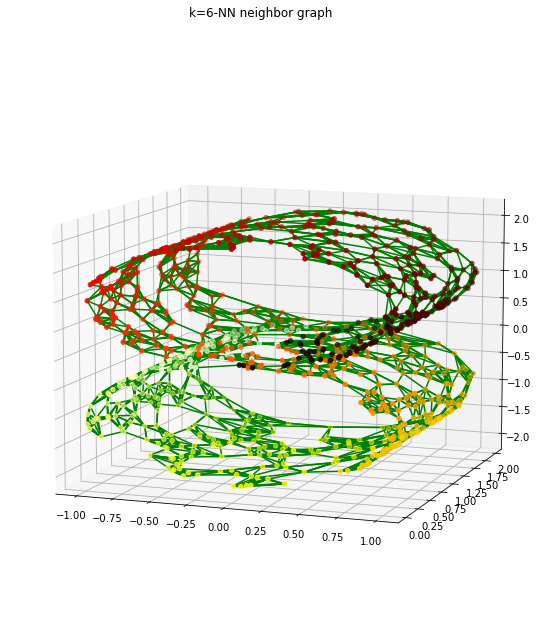

In [9]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection = '3d')
plt.suptitle("k=%i-NN neighbor graph"%k)

#insert line
ax.scatter(dat[:, 0], dat[:, 1], dat[:, 2], c=colour, cmap='hot')
ax.view_init(10, -70) #change the viewing angle

for indx in range(n):
    for j in range(n):
        if np.abs(distances[indx][j]) >0.0:
            x0, y0, z0 = dat[indx]
            x1, y1, z1 = dat[j]
            
            ax.plot([x0,x1],[y0,y1],[z0,z1],color = 'green')

plt.show()

Here we have a kNN graph that shows the approximation of the underlying continuous manifold. Essentially, it makes a skeleton of the manifold (respecting the shape of the manifold). 

In [10]:
from sklearn.datasets import make_swiss_roll
#ISOMAP for 
df_swiss, colour_swiss = make_swiss_roll(n_samples=1000)

In [11]:
n=df_swiss.shape[0]
k= int(np.log(df_swiss.shape[0]))
print("optimal k =", k)
distances_swiss = np.array([[euclidean_distance(v1,v2) for v2 in df_swiss] for v1 in df_swiss])
zero_idxs_swiss = np.argsort(distances_swiss, axis=1)[:,k+1:]
for i in range(n):
    for j in range(zero_idxs_swiss.shape[1]):
        
        q = zero_idxs_swiss[i][j]
        distances_swiss[i][q] = 0

optimal k = 6


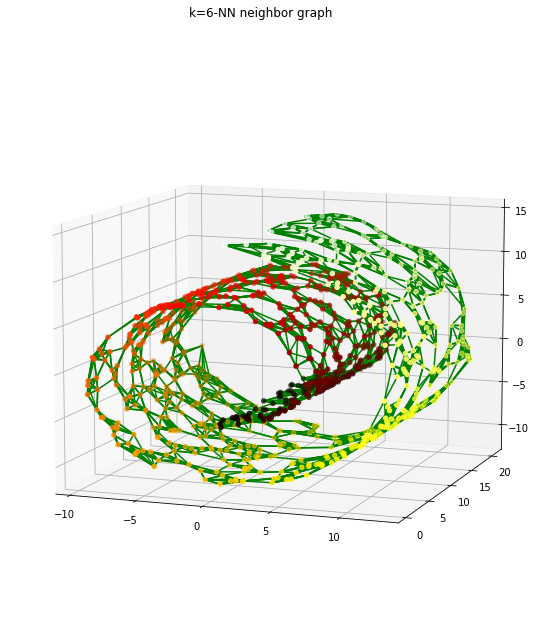

In [12]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection = '3d')
plt.suptitle("k=%i-NN neighbor graph"%k)

#insert line
ax.scatter(df_swiss[:, 0], df_swiss[:, 1], df_swiss[:, 2], c=colour_swiss, cmap='hot')
ax.view_init(10, -70) #change the viewing angle

for indx in range(n):
    for j in range(n):
        if np.abs(distances_swiss[indx][j]) >0.0:
            x0, y0, z0 = df_swiss[indx]
            x1, y1, z1 = df_swiss[j]
            
            ax.plot([x0,x1],[y0,y1],[z0,z1],color = 'green')

plt.show()

Here we have a kNN graph for the swiss roll

**NEXT STEPS:**
Now we would use [Dijkstra's Algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) to calculate the shortest path between two points in the kNN graph. Next, we would compute lower-dimensional embedding by using [multidimensional scaling (MDS)](https://en.wikipedia.org/wiki/Multidimensional_scaling). Therefore, embedding $\mathbb{R}^3$ to $\mathbb{R}^2$.

In [13]:
#isomap using the sklearn
from sklearn import manifold
iso = manifold.Isomap(n_neighbors=6,n_components=2) #using K=6 for your neighborhood size
iso.fit(dat)
dat_2D=iso.transform(dat)

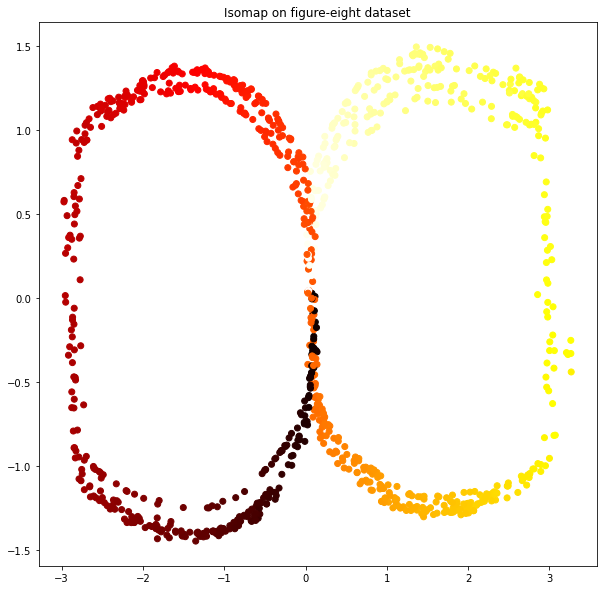

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.scatter(dat_2D[:, 0], dat_2D[:, 1], c=colour, cmap='hot')
plt.title("Isomap on figure-eight dataset")
plt.show()


Here is the $\mathbb{R}^2$ figure 8. As we can see, there are some issues projecting the high-dimensional  $\mathbb{R}^3$ to a low-dimensional $\mathbb{R}^2$. 

In [15]:
iso_swiss= manifold.Isomap(n_neighbors=7,n_components=2) #using K=7 for your neighborhood size
dat_2D_swiss= iso_swiss.fit_transform(df_swiss)


Here is the $\mathbb{R}^2$ swiss roll projecting the high-dimensional  $\mathbb{R}^3$ to a low-dimensional $\mathbb{R}^2$.

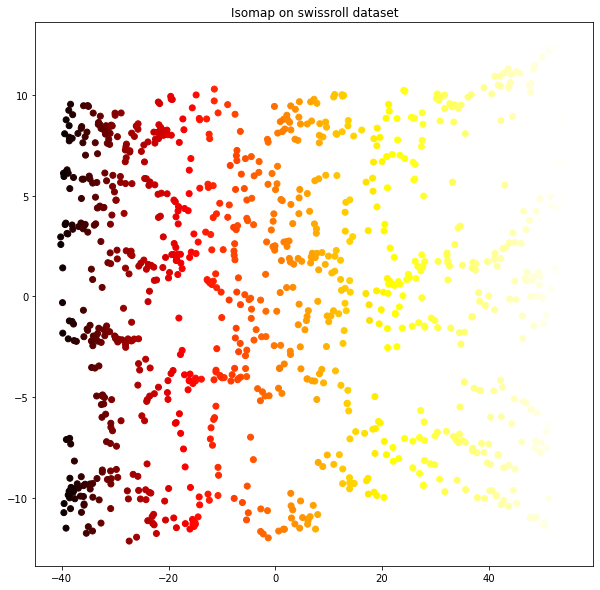

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.scatter(dat_2D_swiss[:, 0], dat_2D_swiss[:, 1], c=colour_swiss, cmap='hot')
plt.title("Isomap on swissroll dataset")
plt.show()